<a href="https://colab.research.google.com/github/chminPark/ml-python/blob/master/%5B%ED%95%99%EC%83%9D%EC%9A%A9%5D%EC%8B%A4%EC%8A%B52_3%EC%9D%BC%EC%B0%A8_CNN_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import copy
import os
import numpy as np 
import random
import time 
import os

torch.backends.cudnn.deterministic = True # Use cudnn as deterministic mode for reproducibility
torch.backends.cudnn.benchmark = False

# CIFAR-10 데이터를 이용한다. 

In [ ]:
##### 실습 : 아래는 어떤 형태로 이미지를 변경하는 것일까요???
transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4), # Random Crop: Randomly crop the part of the large image and utilize it as an augmented data 
        transforms.RandomHorizontalFlip(), # Random Horizontal Flip: Randomly flip the image and utilize it as an augmented data
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023,0.1994,0.2010]), # Normalize the data using the given mean and standard deviation
        ])

#Apply data preprocessing for test set
transform_test = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023,0.1994,0.2010]),
        ]) 

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True) 
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)  

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


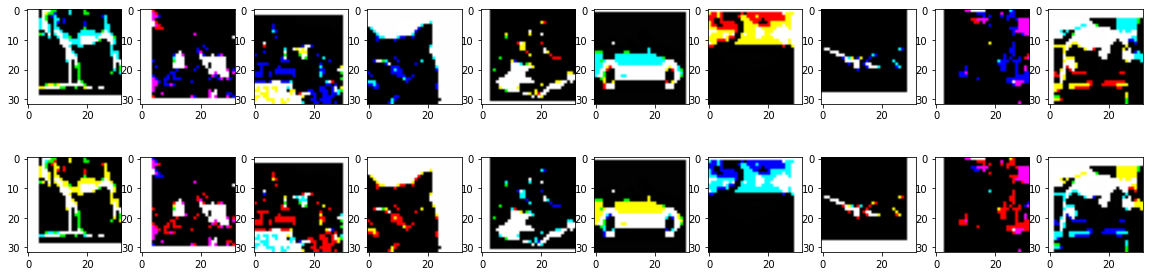

In [ ]:
# Cifar 데이터는 어떻게 생겼을까?
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

idxs = np.random.choice(len(train_dataset), 10, replace=False)

plt.figure(figsize=(20, 5))
for i, idx in enumerate(idxs):

  #### 실습 : Index로 데이터 확인
  #### 1) Tensor to Numpy 2) BGR to RGB
  ???
  #########################################

  plt.subplot(2, 10, i+1)
  plt.imshow(image.astype(np.uint8))
  plt.subplot(2, 10, i+11)
  plt.imshow(image_converted.astype(np.uint8))


# VGG구조
![](https://drive.google.com/uc?export=view&id=1I2AYVIxViWv2Rf9Y9tOWeOo-H2bjZo9K)



In [ ]:
class VGG(nn.Module):
    def __init__(self):
      super(VGG, self).__init__()

      ##### 실습 : 위 그림에 있는 CNN구성 요소 선언
      ???

    def forward(self, x):
      #### 실습 : VGG를 구성한다. 
      ???
      return x

In [ ]:
def reset_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

# 학습함수를 선언하고 학습을 수행한다

In [ ]:
def train(model, data_loader, criterion, optimizer, n_epoch):
  ### 실습 : 학습 중임을 알림
  ???
  for epoch in range(n_epoch):
    running_loss = 0
    for i, (images, labels) in enumerate(data_loader):
      ### 실습 : 데이터를 GPU로 할당
      ???
      outputs = model(images)
      loss = criterion(outputs, labels)
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
      if (i + 1) % 100 == 0:
        print('iteration: [{}/{}]'.format(i + 1, len(data_loader)))
          
    print('Epoch {}, loss = {:.3f}'.format(epoch + 1, running_loss/len(data_loader)))

In [ ]:
reset_seed(2020)
criterion = nn.CrossEntropyLoss()
##### 실습 : 모델을 GPU에 할당한다. 
vgg_model =???

##### Adam 최적화 모델을 할당한다
optimizer = ???

train(vgg_model, train_loader, criterion, optimizer, n_epoch=10)

iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 1, loss = 1.754
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 2, loss = 1.343
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 3, loss = 1.113
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 4, loss = 0.982
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 5, loss = 0.884
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 6, loss = 0.801
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 7, loss = 0.736
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 

# 평가 함수를 구성하고 평가 정확도를 확인한다

In [ ]:
def eval(model, data_loader):
  #### 실습 : 평가를 위해서는 eval()을 선언
  ???
  total = 0
  correct = 0
  #### 실습 : Gradient를 타지 않아야 한다
  with ???:
    for images, labels in data_loader:
      images, labels = images.cuda(), labels.cuda()
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
      
  print('Test Accuracy: {}%'.format(accuracy))

In [ ]:
eval(vgg_model, test_loader)

Test Accuracy: 78.01%


# Batch Normalization을 구현한다

In [ ]:
class MyBatchNorm2d(nn.Module):
  def __init__(self, num_features, alpha=0.1):
    super(MyBatchNorm2d, self).__init__()

    ######### 실습 : 각 Channel에 대해 Scale & Shift할 인자를 정의한다
    self.gamma =???
    self.beta =???
    
    self.running_mean = 0
    self.running_var = 0
    self.n_batches = 0
    self.alpha = alpha
      
  def forward(self, input):
      
    if self.training: # 'model.train()' 이 호출되면 자동으로 True로 세팅됨
      self.n_batches += 1
      ### 실습 : Channel이 차원 1에 있음. 나머지 영역에서 Mean/Var계산
      mean = ???
      var = ???
      
      if self.n_batches == 1:
        ##### 실습 : 첫 Batch에는 평균/분산을 저장한다
        ???
      else:
        ##### 실습 : 평균, 분산에 대한 Moving Average를 계산한다
        ???
    
    else: # 'model.eval()' 이 호출되면 자동으로 True로 세팅됨
      ##### 실습 : infernece 시에는 학습 시 저장한 값 활용
      ???
        
    #### 실습 : Standardization 
    output = ???
    #### 실습 : 각 channel에 있는 값에 scale & shift 수행
    output = ???
    
    return output

# Barch Norm이 들어간 VGG를 구현한다

![](https://drive.google.com/uc?export=view&id=1vLrvhxczx1ZCOH05cxzzESylaOaF1Uj2)


In [ ]:
class VGG_BatchNorm(nn.Module):
  def __init__(self):
    super(VGG_BatchNorm, self).__init__()
    #### 실습 : BatchNormalization이 들어가 있는 구조 선언
    ???

  def forward(self, x):
    #### 실습 : Batch Norm을 Convolution 이후에 선언 
    ???
    return x

In [ ]:
reset_seed(2020)
criterion = nn.CrossEntropyLoss()
vgg_batchnorm_model = VGG_BatchNorm().to("cuda")
optimizer = optim.Adam(params=vgg_batchnorm_model.parameters())

train(vgg_batchnorm_model, train_loader, criterion, optimizer, n_epoch=10)

iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 1, loss = 1.307
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 2, loss = 0.908
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 3, loss = 0.761
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 4, loss = 0.666
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 5, loss = 0.604
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 6, loss = 0.561
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 7, loss = 0.525
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 

In [ ]:
eval(vgg_batchnorm_model, test_loader)

Test Accuracy: 81.96%


# Pytorch 의 BatchNorm2D를 이용

In [ ]:
class VGG_BatchNormTorch(nn.Module):
  def __init__(self):
    ### 실습 : 객체 이름과 초기화 이름은 똑같아야 한다
    super(???, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1) 
    #### 실습 : Batch Norm 을 Pytorch의 값으로 변경한다 
    self.norm1 = ???
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
    self.norm2 =???
    
    self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    #### 실습 : Batch Norm 을 Pytorch의 값으로 변경한다 
    self.norm3 = ???
    
    self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
    #### 실습 : Batch Norm 을 Pytorch의 값으로 변경한다 
    self.norm4 =???

    self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    #### 실습 : Batch Norm 을 Pytorch의 값으로 변경한다 
    self.norm5 = ???
    self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
    #### 실습 : Batch Norm 을 Pytorch의 값으로 변경한다 
    self.norm6 =???

    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2) #Maxpooling layer to change feature size 
    self.avg_pool = nn.AdaptiveAvgPool2d(output_size = (1, 1)) #Note that average pooling layer is not adopted in original VGG architecture. We use average pooling layer to make the architecture for experiment simple.

    self.fc = nn.Linear(in_features=128, out_features=10)

  def forward(self, x):
    #### 실습 : Batch Norm을 Convolution 이후에 선언 
    x = ???
    x = F.relu(x)
    x = ???
    x = F.relu(x)
    x = self.max_pool(x)

    x = ???
    x = F.relu(x)
    x = ???
    x = F.relu(x)
    x = self.max_pool(x)

    x = ???
    x = F.relu(x)
    x = ???
    x = F.relu(x)

    x = self.avg_pool(x)
    x = x.view(-1, 128)
    x = self.fc(x)
    return x

In [ ]:
reset_seed(2020)
criterion = nn.CrossEntropyLoss()
vgg_batchnorm_model_torch = VGG_BatchNormTorch().to("cuda")
optimizer = optim.Adam(params=vgg_batchnorm_model_torch.parameters())

train(vgg_batchnorm_model_torch, train_loader, criterion, optimizer, n_epoch=10)

iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 1, loss = 1.307
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 2, loss = 0.910
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 3, loss = 0.765
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 4, loss = 0.669
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 5, loss = 0.607
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 6, loss = 0.563
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 7, loss = 0.524
iteration: [100/500]
iteration: [200/500]
iteration: [300/500]
iteration: [400/500]
iteration: [500/500]
Epoch 

In [ ]:
eval(vgg_batchnorm_model_torch, test_loader)

Test Accuracy: 81.89%
